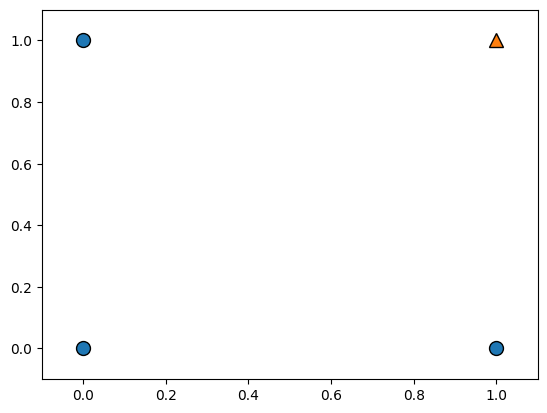

In [1]:
# and
import numpy as np
import mglearn

# and 학습용 데이터와 답
learn_data = np.array([[0,0], [1,0], [0,1], [1,1]])
learn_label = np.array([0, 0, 0, 1]) #답
mglearn.discrete_scatter(learn_data[:,0], learn_data[:,1], learn_label)

In [2]:
from sklearn.svm import LinearSVC  
from sklearn.metrics import accuracy_score

svm = LinearSVC() #직선 선형모형
svm.fit(learn_data, learn_label)

# 모형의 예측값
X_test = np.array([[0,0], [1,0], [0,1], [1,1]])
pred = svm.predict(X_test)

# 모형 평가
print(X_test , "의 예측 결과: " ,  pred)
print("정답률 = " , accuracy_score([0, 0, 0, 1], pred))

[[0 0]
 [1 0]
 [0 1]
 [1 1]] 의 예측 결과:  [0 0 0 1]
정답률 =  1.0


c:\python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


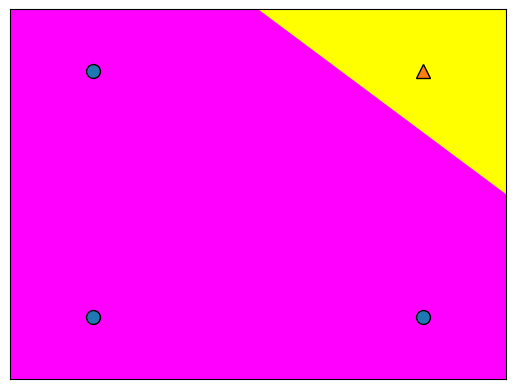

In [3]:
mglearn.discrete_scatter(learn_data[:,0],learn_data[:,1],learn_label)  
mglearn.plots.plot_2d_classification(svm, learn_data, cm='spring')

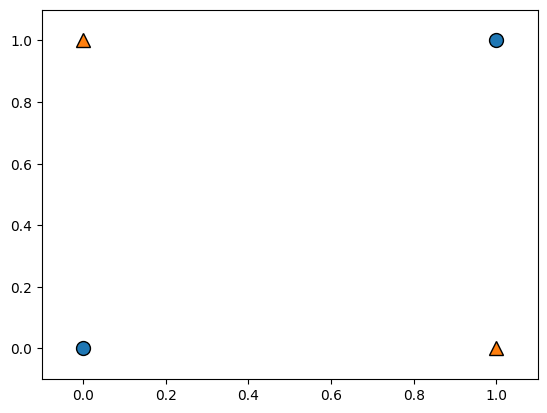

In [4]:
# xor

import numpy as np  
import mglearn

X_train = np.array([[0,0], [1,0], [0,1], [1,1]])

# X xor Y

y_train = [0, 1, 1, 0]  

mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)

In [5]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score

#svm = SVC(kernel='linear')
svm = SVC(kernel='rbf') #비선형모델,곡선
svm.fit(X_train, y_train)

# 예측
X_test = np.array([[0,0], [1,0], [0,1], [1,1]])
pred = svm.predict(X_test)

# 평가
print(X_test , "의 예측 결과: " ,  pred)
print("정답률 = " , accuracy_score([0, 1, 1, 0], pred)) 

[[0 0]
 [1 0]
 [0 1]
 [1 1]] 의 예측 결과:  [0 1 1 0]
정답률 =  1.0


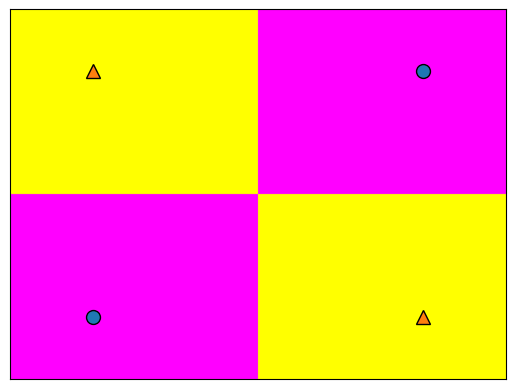

In [6]:
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)  
mglearn.plots.plot_2d_classification(svm, X_train, cm='spring')

In [ ]:
#올리베티 얼굴 데이터셋
# The Olivetti faces dataset

# 1992~1994 AT&T와 캠브리지 대학 전산 연구실에서 공동으로 제작한 얼굴 사진 데이터베이스
# 40명의 흑백 얼굴 사진 400장, 4096 (64x64) 특성
# 0.0~1.0 (0~255 를 스케일링)

In [7]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

#40명 400장의 흑백이미지

print(len(faces.data))

print(set(faces.target))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\user\scikit_learn_data
400
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}


In [8]:
faces.data.shape # 이미지 400장, 64x64(4096픽셀)

(400, 4096)

In [9]:
faces.data[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

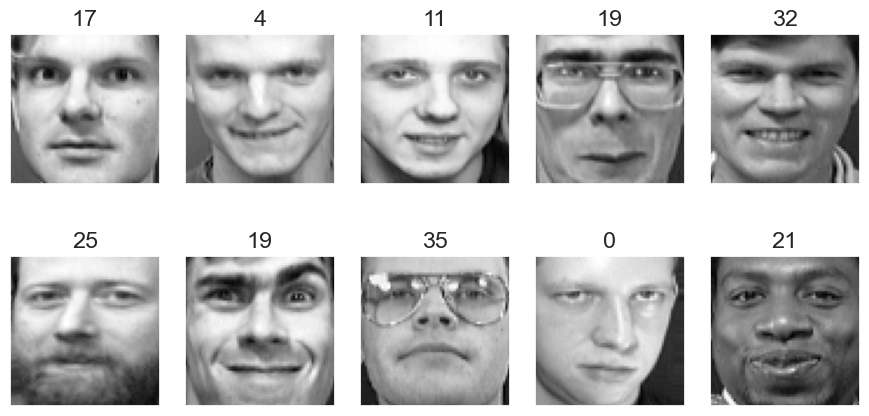

In [22]:
import matplotlib.pyplot as plt
import numpy as np

N = 2 #2행
M = 5 #5열

np.random.seed(0) #랜덤시드 고정

fig = plt.figure(figsize=(9, 5))
#컬러맵: https://matplotlib.org/tutorials/colors/colormaps.html

klist = np.random.choice(range(len(faces.data)), N * M)

for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.gray)
        ax.xaxis.set_ticks([]) #x축 눈금 제거
        ax.yaxis.set_ticks([]) #y축 눈금 제거
        plt.title(faces.target[k])

plt.tight_layout() #여백 조절
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, stratify=faces.target, test_size=0.2, random_state=0)

In [12]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)

In [13]:
import sys

print(sys.getsizeof(X_train)/(1024*1024)) # 메모리 용량 계산 5MB

5.0001220703125


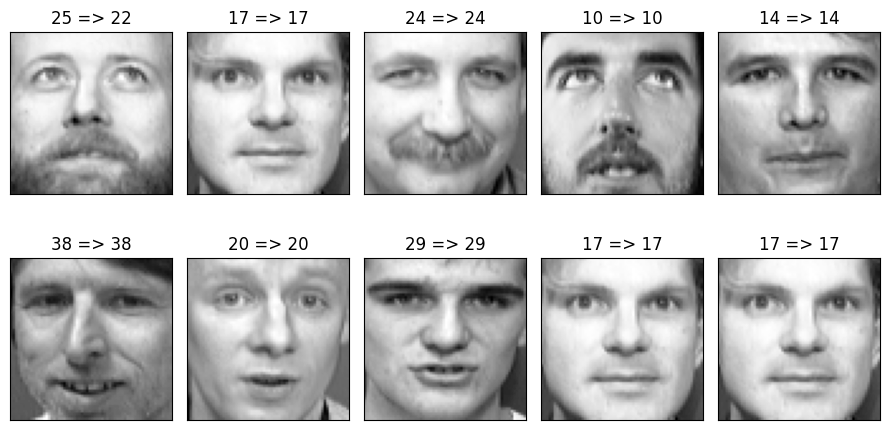

In [14]:
N = 2
M = 5

np.random.seed(4)
fig = plt.figure(figsize=(9, 5))

klist = np.random.choice(range(len(y_test)), N * M)

for i in range(N):

    for j in range(M):

        k = klist[i * M + j]

        ax = fig.add_subplot(N, M, i * M + j + 1)

        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.gray)

        ax.xaxis.set_ticks([])

        ax.yaxis.set_ticks([])

        pred=svc.predict(X_test[k:(k + 1), :])[0]

        plt.title(f"{y_test[k]} => {pred}")

        

plt.tight_layout()

plt.show()

In [15]:
print("학습용:",svc.score(X_train, y_train))

print("검증용:",svc.score(X_test, y_test))

학습용: 1.0
검증용: 0.95


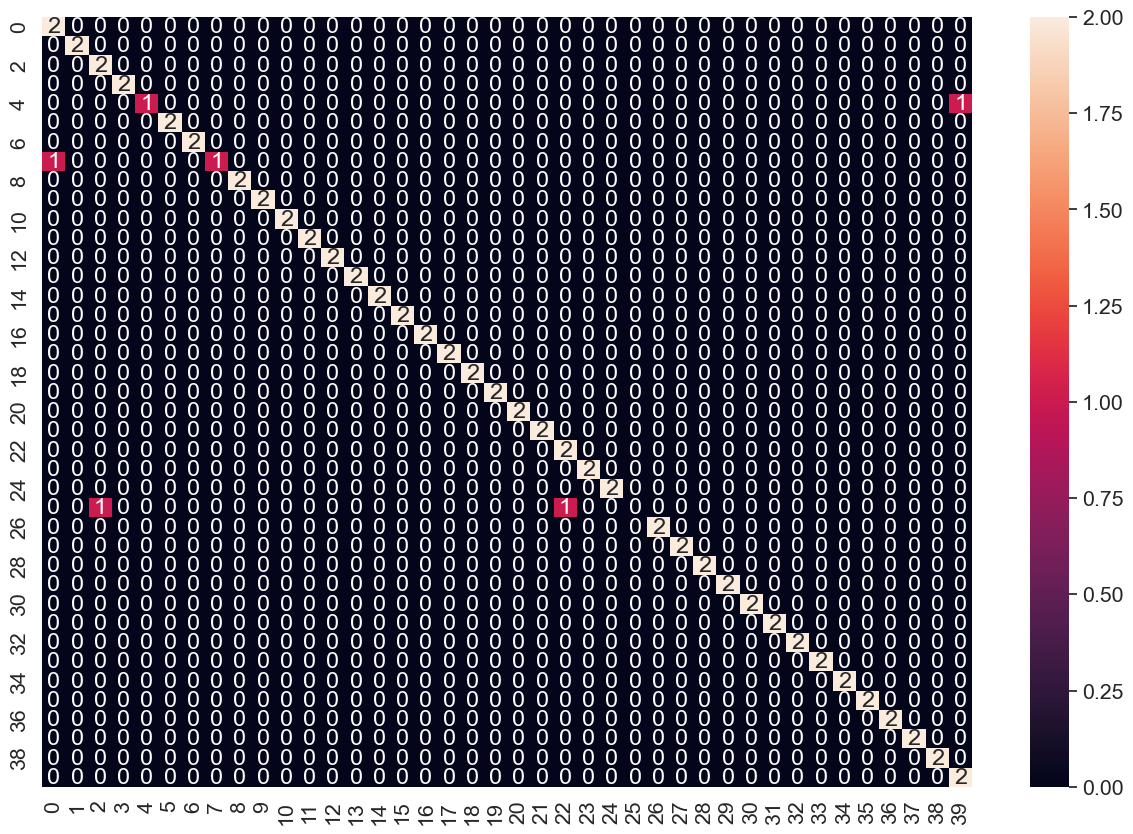

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

import pandas as pd

pred = svc.predict(X_test)

cm=confusion_matrix(y_test, pred) # 정오분류표

# 데이터프레임으로 변환

df_cm=pd.DataFrame(cm, index=range(0,40),columns=range(0,40))

sns.set(font_scale=1.4)
plt.figure(figsize=(15,10))

sns.heatmap(df_cm, annot=True) #히트맵 출력

plt.show()

In [17]:
print(classification_report(y_test, pred))

# class 4,7은 정확도가 낮음(f1-score 기준)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

c:\python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


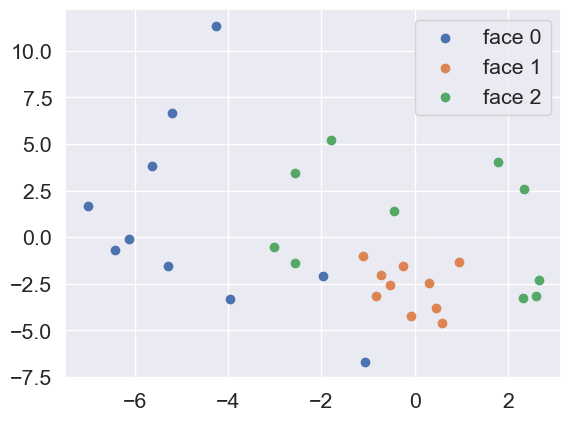

In [18]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

pca=PCA(n_components=2, random_state=10) #주성분 분석

components=pca.fit_transform(faces.data)
df=pd.DataFrame(data=components, columns=['component 1','component 2'])
df.index=faces.target

#plt.figure(figsize=(20,15))
#for i in range(40):

for i in range(3):
    plt.scatter(df.iloc[faces.target == i, 0], df.iloc[faces.target == i, 1],  label=f'face {i}')
    plt.legend()

plt.show()

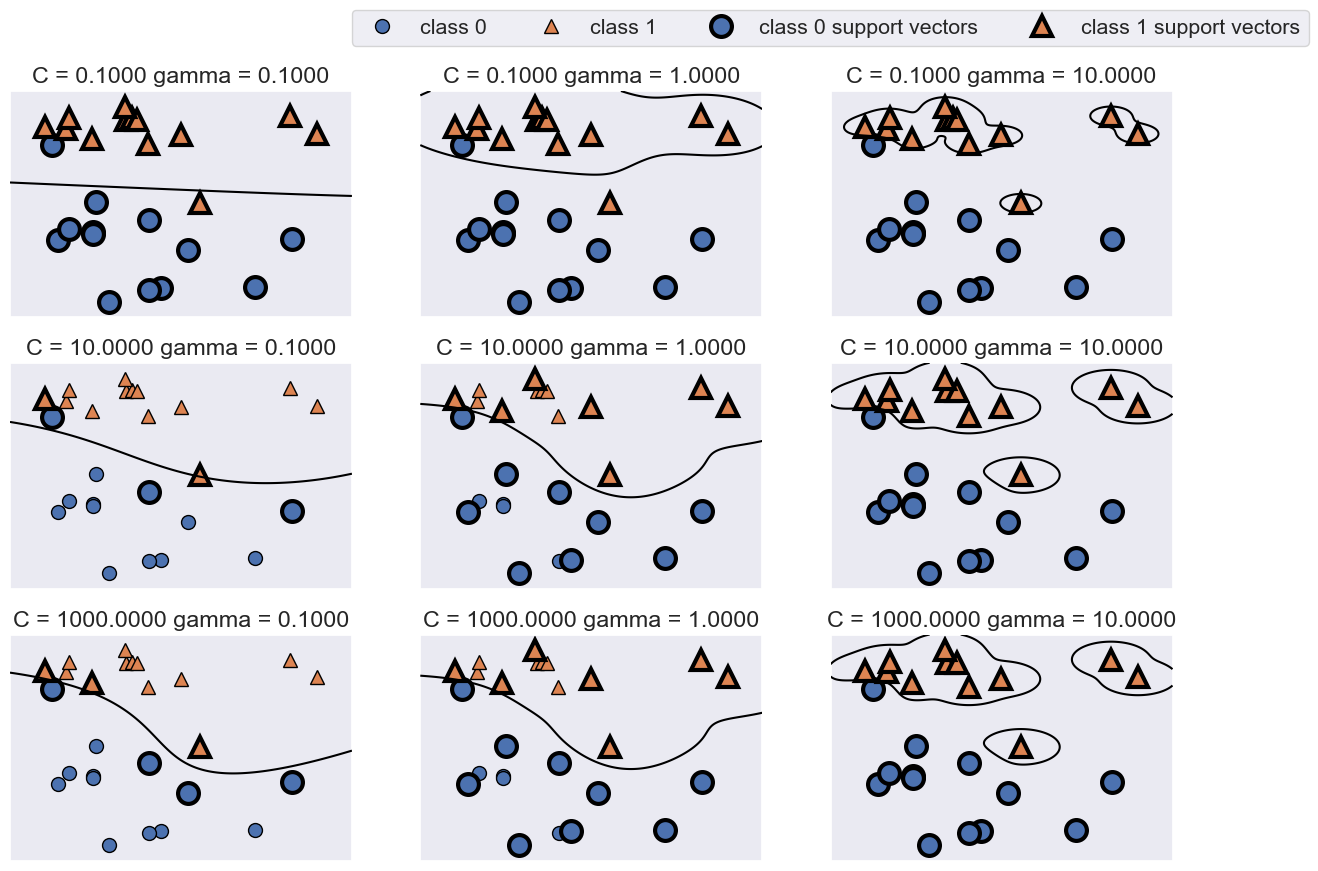

In [23]:
# cost와 gamma

import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# cost : 0.1, 10, 1000
# gamma : 0.1, 1, 10

for ax, C in zip(axes, [-1, 1, 3]):
    for a, gamma in zip(ax, [-1, 0, 1]):        
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

#ncol=4 4개의 셀을 합쳐서 범례 표시

axes[0, 0].legend(["class 0", "class 1", "class 0 support vectors", "class 1 support vectors"], ncol=4, loc=(1, 1.2))


In [24]:
# 오존량 예측

import pandas as pd

# csv 파일을 로딩

df = pd.read_csv("c:/data/ozone/ozone2.csv")

df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


In [25]:
df["Result"].value_counts()

Result
1    81
0    72
Name: count, dtype: int64

In [26]:
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

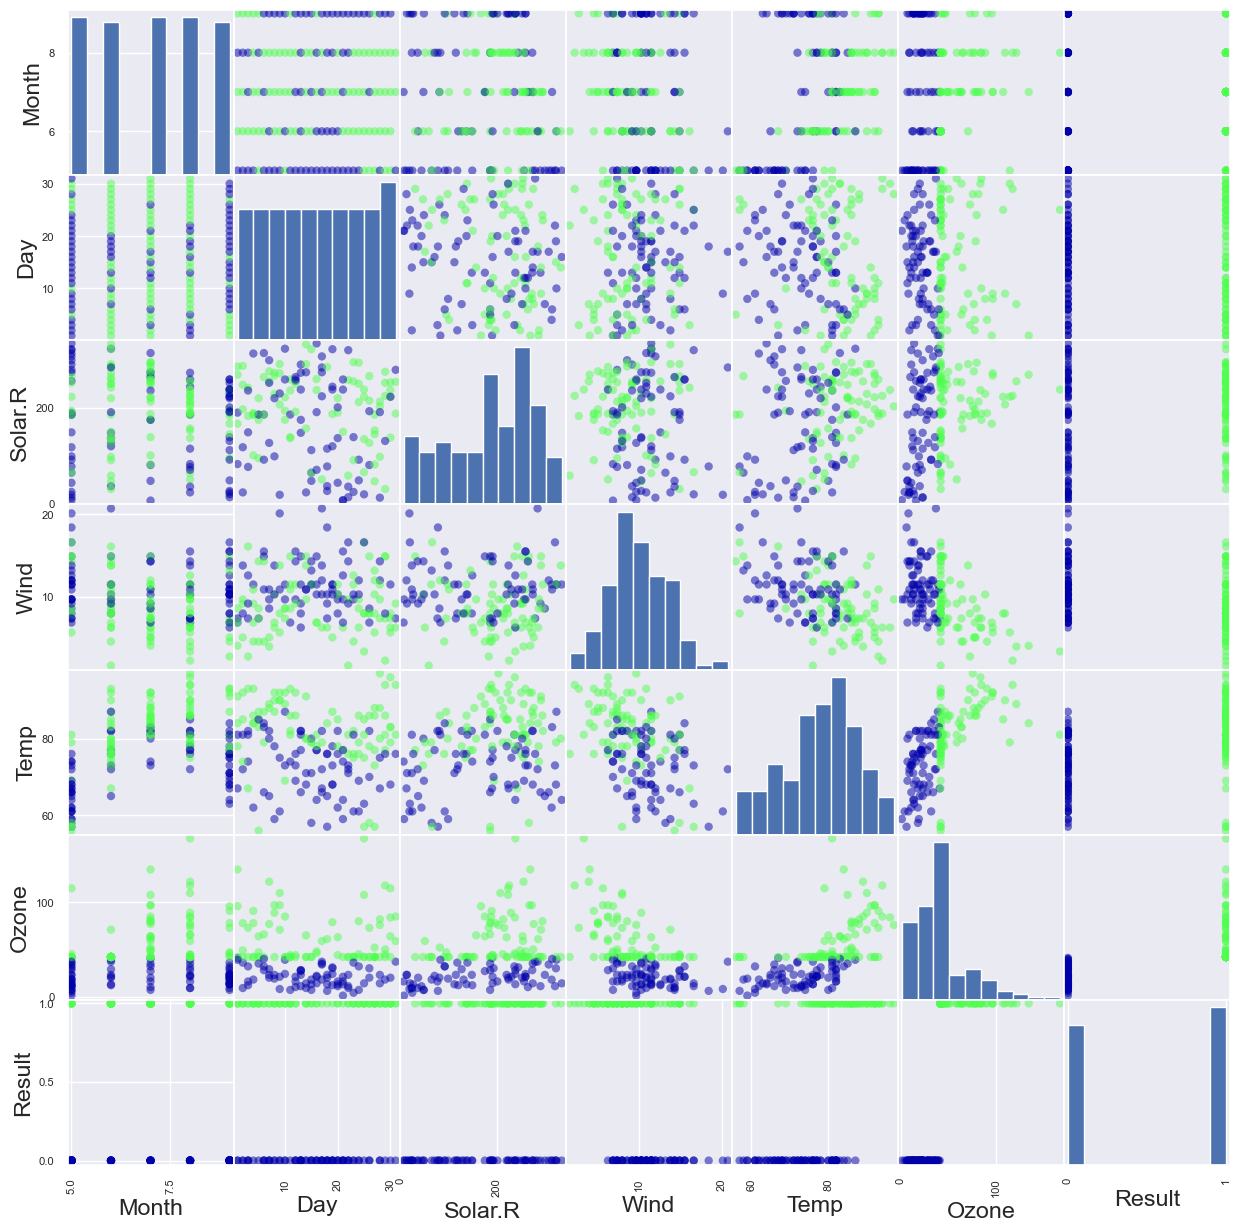

In [27]:
import mglearn

import matplotlib.pyplot as plt

#산점도 행렬 출력

pd.plotting.scatter_matrix(df, c=y, figsize=(15, 15),marker='o', cmap=mglearn.cm3)

plt.show()

In [28]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["Result"].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

In [29]:
X = X_samp[cols]

y = y_samp['Result']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)

In [31]:
from sklearn.svm import SVC

model = SVC(random_state=10)
model.fit(X_train, y_train)


SVC(random_state=10)

In [32]:
import numpy as np

pred=model.predict(X_test)

print("학습용:",model.score(X_train, y_train))

print("검증용:",model.score(X_test, y_test))

학습용: 0.6347826086956522
검증용: 0.6896551724137931


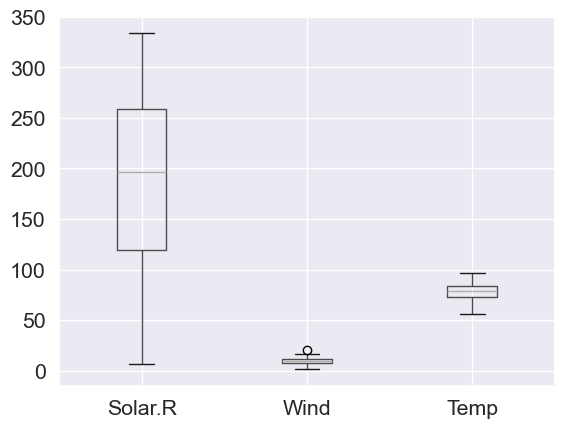

In [33]:
X_train.boxplot()

plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = pd.DataFrame(ss.transform(X_train))
X_test_scaled = pd.DataFrame(ss.transform(X_test))

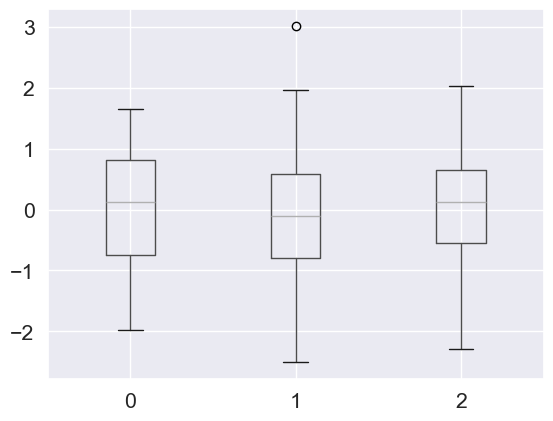

In [35]:
X_train_scaled.boxplot()

plt.show()

In [36]:
model = SVC(random_state=10)

model.fit(X_train_scaled, y_train)

print("학습용:",model.score(X_train_scaled, y_train))

print("검증용:",model.score(X_test_scaled, y_test))

#예측률이 개선됨

학습용: 0.7391304347826086
검증용: 0.8620689655172413


In [37]:
#최적의 C value와 gamma value를 찾는 과정
#최적의 C value
#C값을 증가시키면 모델이 좀더 복잡해짐(좀더 자세하게 결정경계를 찾아내는 방식)
#C값이 작으면 이상치들이 있을 가능성을 크게 잡아서 일반적인 결정 경계를 만들어낸다.
#최적의 gamma value
#gamma값을 증가시키면 각각의 데이터 포인트가 영향력을 행사하는 거리가 짧아지고
#gamma값이 작으면 영향력을 행사하는 거리가 길어진다.
#너무 크면 과대적합의 위험이 있고 너무 작으면 과소적합의 위험이 있음
import numpy as np

train_rate = []
test_rate = []
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]

for n in c_values:
    for g in g_values:
        # 모델 생성
        model = SVC(C=n,gamma=g,random_state=10) #C 오차 패널티
        model.fit(X_train_scaled, y_train)
        # 학습용 데이터셋의 정확도
        train_rate.append([n,g,model.score(X_train_scaled, y_train)])
        # 검증용 데이터셋의 정확도
        test_rate.append([n,g,model.score(X_test_scaled, y_test)])

train_arr=np.array(train_rate) #검증용 데이터셋의 정확도
test_arr=np.array(test_rate) #검증용 데이터셋의 정확도
max_rate=np.max(test_arr[:,2]) #가장 좋은 정확도
idx=np.where(test_arr[:,2] == max_rate)[0][0] #가장 성능이 좋은 인덱스

print("최적의 c:",test_rate[idx][0])
print("최적의 gamma:",test_rate[idx][1])
print("최적의 정확도:",test_rate[idx][2])     

최적의 c: 1
최적의 gamma: 0.1
최적의 정확도: 0.8620689655172413


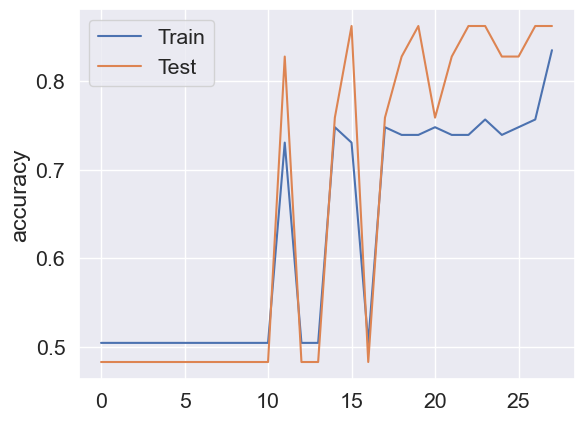

In [38]:
plt.plot(range(len(train_rate)), train_arr[:,2], label="Train")
plt.plot(range(len(test_rate)), test_arr[:,2], label="Test")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [39]:
#최적의 C, gamma value를 적용한 모형

model = SVC(C=100,gamma=0.01,random_state=10)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))

#예측률이 개선됨

학습용: 0.7391304347826086
검증용: 0.8620689655172413


In [40]:
#confusion matrix(혼동행렬, 오분류표) 출력

from sklearn.metrics import confusion_matrix

pred=model.predict(X_test_scaled)
confusion_matrix(y_test, pred)

array([[13,  1],
       [ 3, 12]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report  

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.92      0.80      0.86        15

    accuracy                           0.86        29
   macro avg       0.87      0.86      0.86        29
weighted avg       0.87      0.86      0.86        29



In [2]:
#변수의 중요도

import pandas as pd

df = pd.read_csv("c:/data/customer/customer.csv")

df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:
cols=["Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls','Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins','Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge','CustServ Calls']

X=df[cols]

y=df['Churn']

y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [4]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Churn'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

df_samp['Churn'].value_counts()

Churn
0    483
1    483
Name: count, dtype: int64

In [5]:
X=df_samp[cols]

y=df_samp['Churn']

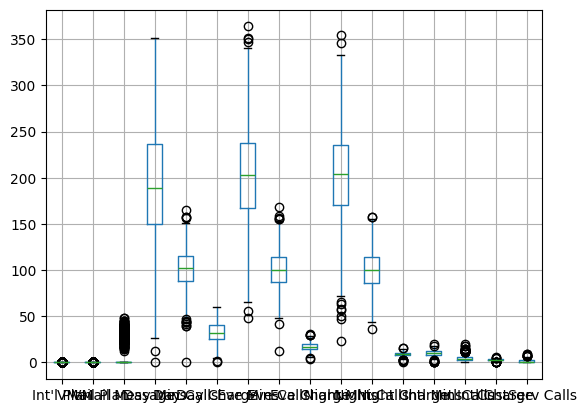

In [6]:
import matplotlib.pyplot as plt

X.boxplot()

plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler() #평균 0, 표준편차 1

scaler.fit(X) #패턴분석

X_scaled = pd.DataFrame(scaler.transform(X))

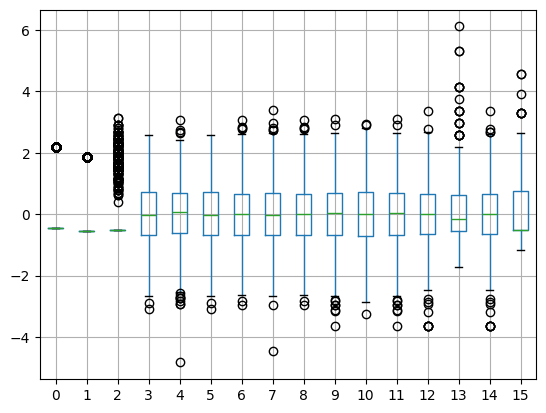

In [8]:
X_scaled.boxplot()  

plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import numpy as np

svm = SVC(random_state=0).fit(X, y)
#모형을 만드는데 사용된 변수들의 특성 중요도 - 트리 알고리즘에 더욱 적합한 방법

result1 = permutation_importance(svm, X, y, n_repeats=10, random_state=0,n_jobs=-1)
importances1=np.array(list(zip(X.columns, result1.importances_mean)))

rf = RandomForestClassifier(random_state=0).fit(X, y)

result2 = permutation_importance(rf, X, y, n_repeats=10, random_state=0,n_jobs=-1)
importances2=np.array(list(zip(X.columns, result2.importances_mean)))

In [19]:
df2=pd.DataFrame(importances1,columns=['variable','importance'])  

df2.sort_values('importance',ascending=False)

,variable,importance
3,Day Mins,0.15186335403726708
6,Eve Mins,0.052380952380952375
12,Intl Mins,0.003209109730848847
10,Night Calls,0.0026915113871635588
9,Night Mins,0.0025879917184264967
4,Day Calls,0.0025879917184264854
2,VMail Message,0.0023809523809523725
7,Eve Calls,0.002277432712215344
13,Intl Calls,0.001138716356107683
15,CustServ Calls,0.001138716356107683


In [20]:
df2=pd.DataFrame(importances2,columns=['variable','importance'])  

df2.sort_values('importance',ascending=False)

,variable,importance
15,CustServ Calls,0.1571428571428571
0,Int'l Plan,0.09679089026915115
5,Day Charge,0.05786749482401656
3,Day Mins,0.04886128364389233
13,Intl Calls,0.02204968944099379
6,Eve Mins,0.021635610766045543
8,Eve Charge,0.02142857142857142
10,Night Calls,0.013975155279503127
4,Day Calls,0.01314699792960664
7,Eve Calls,0.009109730848861287


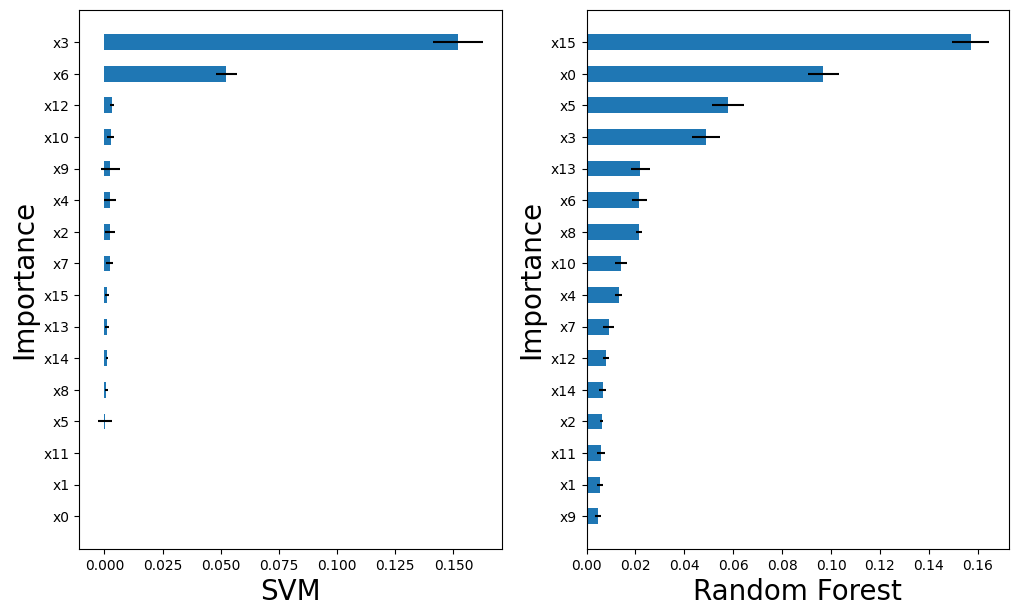

In [12]:
def plot_importance(importance, importance_std, ax, x_label, y_label='Importance'):

    temp1 = [f'x{i}' for i in range(len(importance))]
    temp2 = importance
    temp3 = importance_std
    result = sorted(zip(temp1, temp2, temp3), key=lambda x:x[1]) #[1]:두번쨰값
    label = [x[0] for x in result]
    value = [x[1] for x in result]
    value_2 = [x[2] for x in result]
    ax.barh(label, value, xerr=value_2, height=0.5)
    ax.set_xlabel(x_label, fontsize=20)
    ax.set_ylabel(y_label, fontsize=20)

# 시각화
fig, axs = plt.subplots(1, 2) # 1행2열
fig.set_facecolor('white')
fig.set_figwidth(12)

fig.set_figheight(7)
ax1 = plt.subplot(1, 2, 1) #1행 2열 1번
ax2 = plt.subplot(1, 2, 2)

plot_importance(result1.importances_mean,
                result1.importances_std, ax1, 'SVM')

plot_importance(result2.importances_mean,
                result2.importances_std, ax2, 'Random Forest')

plt.show()